In [39]:
## Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis
import seaborn as sns

In [6]:
## Read the file
churn = pd.read_csv('churn_hr.txt',delimiter=',')
churn.head()

,Age,Gender,MaritalStatus,Education,EducationField,JobRole,Department,BusinessTravel,MonthlyIncome,DistanceFromHome,JobSatisfaction,JobInvolvement,RelationshipSatisfaction,PerformanceRating,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Churn
0,41,Female,Single,College,Life Sciences,Sales Executive,Sales,Travel_Rarely,5993,1,Very High,High,Low,Excellent,6,4,0,5,Yes
1,49,Male,Married,Below College,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,5130,8,Medium,Medium,Very High,Outstanding,10,7,1,7,No
2,37,Male,Single,College,Other,Laboratory Technician,Research & Development,Travel_Rarely,2090,2,High,Medium,Medium,Excellent,0,0,0,0,Yes
3,33,Female,Married,Master,Life Sciences,Research Scientist,Research & Development,Travel_Frequently,2909,3,High,High,High,Excellent,8,7,3,0,No
4,27,Male,Married,Below College,Medical,Laboratory Technician,Research & Development,Travel_Rarely,3468,2,Medium,High,Very High,Excellent,2,2,2,2,No


In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Gender                    1470 non-null   object
 2   MaritalStatus             1470 non-null   object
 3   Education                 1470 non-null   object
 4   EducationField            1470 non-null   object
 5   JobRole                   1470 non-null   object
 6   Department                1470 non-null   object
 7   BusinessTravel            1470 non-null   object
 8   MonthlyIncome             1470 non-null   int64 
 9   DistanceFromHome          1470 non-null   int64 
 10  JobSatisfaction           1470 non-null   object
 11  JobInvolvement            1470 non-null   object
 12  RelationshipSatisfaction  1470 non-null   object
 13  PerformanceRating         1470 non-null   object
 14  YearsAtCompany          

In [10]:
print(churn.isnull().any().sum())

0


In [12]:
churn.describe()

,Age,MonthlyIncome,DistanceFromHome,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,9.192517,7.008163,4.229252,2.187755,4.123129
std,9.135373,4707.956783,8.106864,6.126525,3.623137,3.222430,3.568136
min,18.000000,1009.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2911.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,4919.000000,7.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,8379.000000,14.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,19999.000000,29.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
## Calculate the churn rate

In [14]:
churned_number = churn[churn['Churn']=='Yes'].shape[0]
total_number = churn.shape[0]
churn_rate = churned_number/total_number
print(f"The churn rate among the company's employees is {churn_rate * 100:.2f}%")

The churn rate among the company's employees is 16.12%


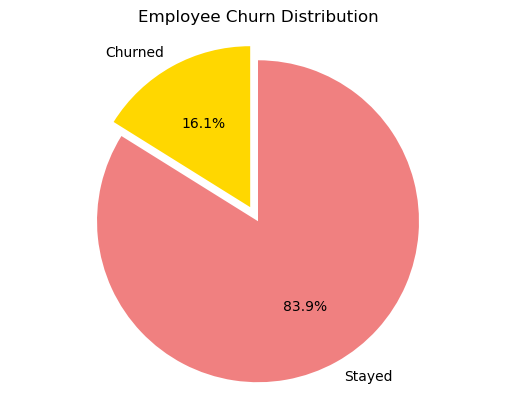

In [16]:
plt.pie([churned_number, total_number - churned_number], 
        labels=['Churned', 'Stayed'], 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=(0.1,0),
        colors=['gold','lightcoral'])
plt.title('Employee Churn Distribution')
plt.axis('equal')
plt.show()

In [ ]:
## Distribution of Variables

In [31]:
## Numeric Varibles
churn_num = churn.select_dtypes(include=[np.number])

In [37]:
summary_num = pd.DataFrame({
    'Variable': churn_num.columns,
    'Max': churn_num.max(),
    'Min': churn_num.min(),
    'Mean': churn_num.mean(),
    'Median': churn_num.median(),
    'Variance': churn_num.var(),
    'Skewness': churn_num.apply(lambda x: skew(x, bias=False)),
    'Kurtosis': churn_num.apply(lambda x: kurtosis(x, bias=False))
})
summary_num.set_index('Variable', inplace=True)
print(summary_num)

                           Max   Min         Mean  Median      Variance  \
Variable                                                                  
Age                         60    18    36.923810    36.0  8.345505e+01   
MonthlyIncome            19999  1009  6502.931293  4919.0  2.216486e+07   
DistanceFromHome            29     1     9.192517     7.0  6.572125e+01   
YearsAtCompany              40     0     7.008163     5.0  3.753431e+01   
YearsInCurrentRole          18     0     4.229252     3.0  1.312712e+01   
YearsSinceLastPromotion     15     0     2.187755     1.0  1.038406e+01   
YearsWithCurrManager        17     0     4.123129     3.0  1.273160e+01   

                         Skewness  Kurtosis  
Variable                                     
Age                      0.413286 -0.404145  
MonthlyIncome            1.369817  1.005233  
DistanceFromHome         0.958118 -0.224833  
YearsAtCompany           1.764529  3.935509  
YearsInCurrentRole       0.917363  0.477421  
Ye

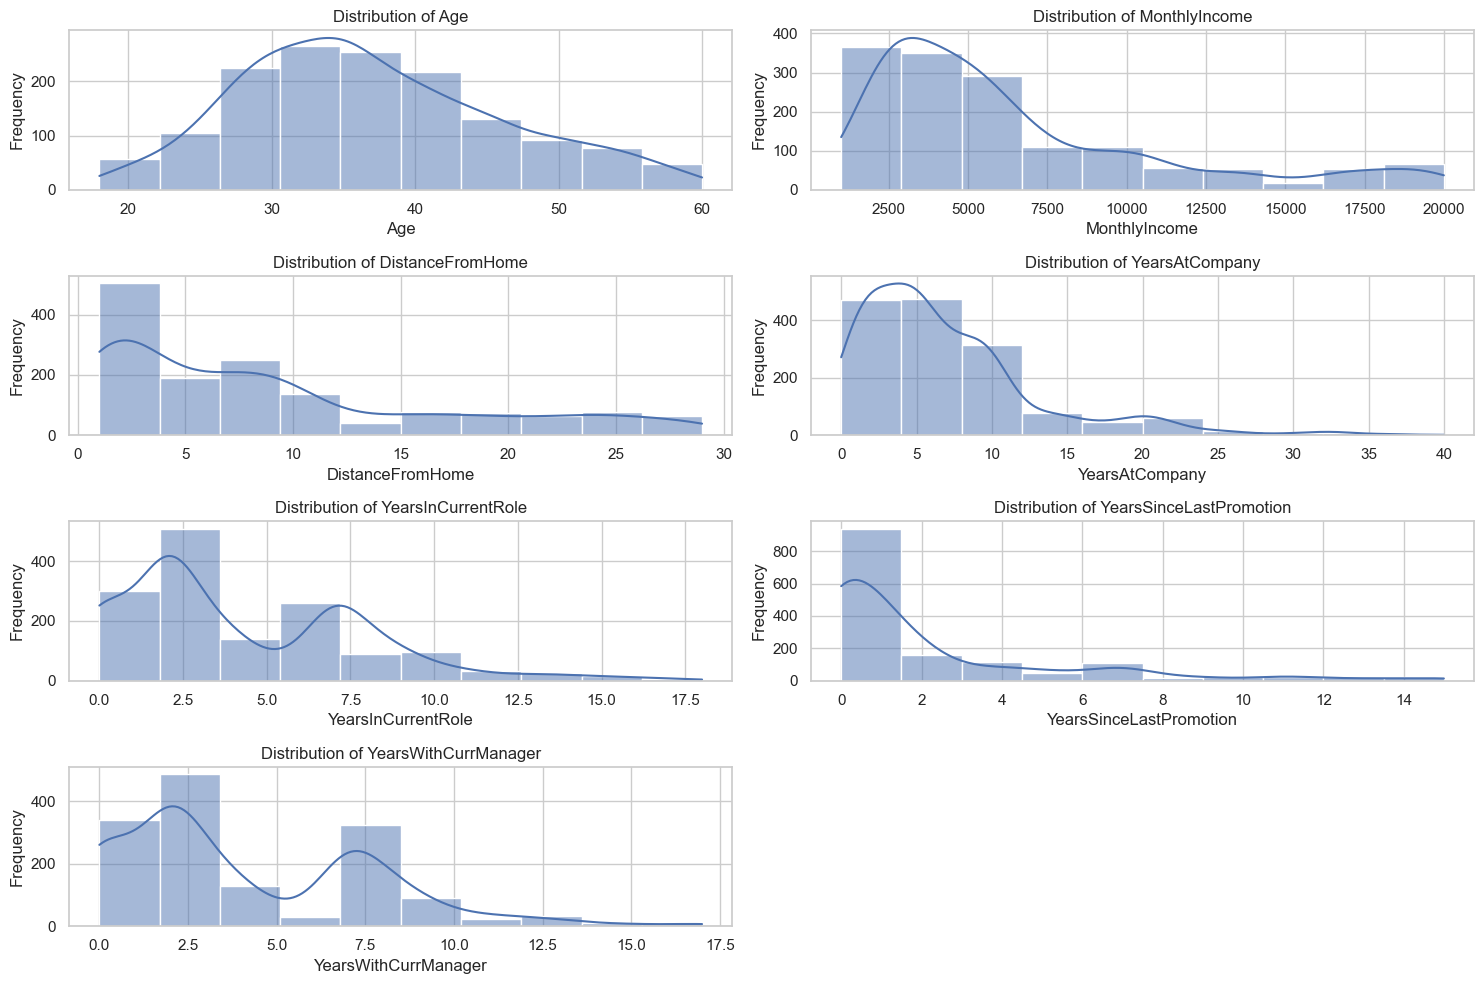

In [47]:
numeric_cols = churn_num.columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i + 1)  
    sns.histplot(churn_num[col], kde=True, bins=10) 
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col)  
    plt.ylabel('Frequency')  

plt.tight_layout()  
plt.show()  